<a href="https://colab.research.google.com/github/VishalRavichandran27/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from re import M
measuring = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
measuring.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
measuring['Bmi'] = round(measuring['Weight']/(measuring['Height']*0.01)**1)

In [4]:
measuring

,Gender,Height,Weight,Index,Bmi
0,Male,174,96,4,55.0
1,Male,189,87,2,46.0
2,Female,185,110,4,59.0
3,Female,195,104,3,53.0
4,Male,149,61,3,41.0
...,...,...,...,...,...
495,Female,150,153,5,102.0
496,Female,184,121,4,66.0
497,Female,141,136,5,96.0
498,Male,150,95,5,63.0


In [5]:
measuring = measuring.drop(columns = ['Index'])

In [6]:
measuring

,Gender,Height,Weight,Bmi
0,Male,174,96,55.0
1,Male,189,87,46.0
2,Female,185,110,59.0
3,Female,195,104,53.0
4,Male,149,61,41.0
...,...,...,...,...
495,Female,150,153,102.0
496,Female,184,121,66.0
497,Female,141,136,96.0
498,Male,150,95,63.0


In [7]:
diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
diabetes['bmi'] = round(diabetes['bmi'],1)
diabetes = diabetes.rename(str.title, axis = 'columns')

In [9]:
diabetes['Age'] = diabetes['Age'].astype(int)

In [10]:
diabetes = diabetes.merge(measuring, how = 'inner', on = ['Bmi','Gender'])

In [11]:
diabetes['Diabetes'].value_counts()

0    10206
1     1766
Name: Diabetes, dtype: int64

In [12]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
diabetes.head()

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,Bmi,Hba1C_Level,Blood_Glucose_Level,Diabetes,Height,Weight
0,Female,78,0,0,former,36.0,5.0,130,0,162,58
1,Female,78,0,0,former,36.0,5.0,130,0,148,54
2,Female,78,0,0,former,36.0,5.0,130,0,172,62
3,Female,78,0,0,former,36.0,5.0,130,0,157,56
4,Female,78,0,0,former,36.0,5.0,130,0,191,68


In [14]:
heart.columns = ['Age', 'Gender', 'Chest_pain', 'Systole', 'Cholesterol', 'Diabetes', 'Resting_ECG','Max_HR', 'Exercise_angina', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Heart_Disease' ]

In [15]:
heart

,Age,Gender,Chest_pain,Systole,Cholesterol,Diabetes,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [16]:
heart

,Age,Gender,Chest_pain,Systole,Cholesterol,Diabetes,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
heart_female = heart[heart['Gender']==0]
heart_male = heart[heart['Gender']==1]
heart_female['Gender'] = 'Female'
heart_male['Gender'] = 'Male'
gender = [heart_male,heart_female]
heart = pd.concat(gender,axis =0)
heart

<ipython-input-17-fb95a3953479>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_female['Gender'] = 'Female'
<ipython-input-17-fb95a3953479>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_male['Gender'] = 'Male'


,Age,Gender,Chest_pain,Systole,Cholesterol,Diabetes,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal,Heart_Disease
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,Male,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,Male,1,120,263,0,1,173,0,0.0,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,Female,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,Female,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,Female,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,Female,0,140,241,0,1,123,1,0.2,1,0,3,0


<Axes: xlabel='Age', ylabel='Cholesterol'>

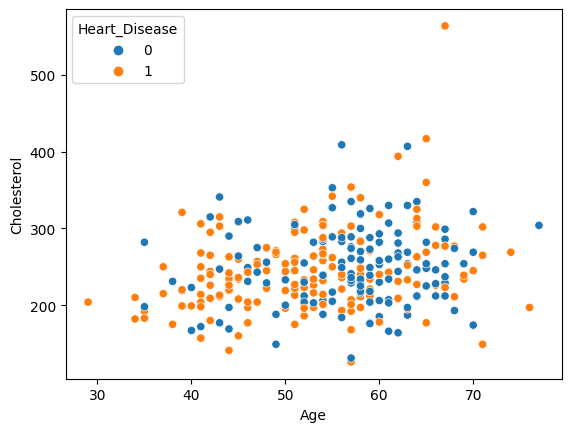

In [18]:
sns.scatterplot(x = heart['Age'], y = heart['Cholesterol'],hue = heart['Heart_Disease'])

In [19]:
diabetes = diabetes.merge(heart, how = 'inner', on = ['Age','Gender', 'Diabetes', 'Heart_Disease']).sort_values(by = 'Hba1C_Level')
diabetes['Bmi'] = round(diabetes['Bmi'],1)

In [20]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9380 entries, 5647 to 3604
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               9380 non-null   object 
 1   Age                  9380 non-null   int64  
 2   Hypertension         9380 non-null   int64  
 3   Heart_Disease        9380 non-null   int64  
 4   Smoking_History      9380 non-null   object 
 5   Bmi                  9380 non-null   float64
 6   Hba1C_Level          9380 non-null   float64
 7   Blood_Glucose_Level  9380 non-null   int64  
 8   Diabetes             9380 non-null   int64  
 9   Height               9380 non-null   int64  
 10  Weight               9380 non-null   int64  
 11  Chest_pain           9380 non-null   int64  
 12  Systole              9380 non-null   int64  
 13  Cholesterol          9380 non-null   int64  
 14  Resting_ECG          9380 non-null   int64  
 15  Max_HR               9380 non-null 

In [21]:
diabetes = diabetes.drop(columns = 'Smoking_History')

In [22]:
diabetes

,Gender,Age,Hypertension,Heart_Disease,Bmi,Hba1C_Level,Blood_Glucose_Level,Diabetes,Height,Weight,Chest_pain,Systole,Cholesterol,Resting_ECG,Max_HR,Exercise_angina,Oldpeak,Slope,CA,Thal
5647,Male,46,0,0,33.0,3.5,159,0,155,51,2,150,231,1,147,0,3.6,1,0,2
4377,Male,52,0,0,25.0,3.5,130,0,198,50,0,112,230,1,160,0,0.0,2,1,2
4378,Male,52,0,0,25.0,3.5,130,0,198,50,0,125,212,1,168,0,1.0,2,2,3
4445,Male,52,0,0,33.0,3.5,155,0,155,51,0,128,255,1,161,1,0.0,2,1,3
4446,Male,52,0,0,33.0,3.5,155,0,155,51,0,112,230,1,160,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9072,Male,56,0,0,63.0,9.0,145,1,165,104,0,130,283,0,103,1,1.6,0,0,3
9071,Male,56,0,0,63.0,9.0,145,1,165,104,0,125,249,0,144,1,1.2,1,1,2
582,Female,56,0,0,36.0,9.0,145,1,164,59,0,200,288,0,133,1,4.0,0,2,3
9081,Male,56,0,0,63.0,9.0,145,1,150,95,0,130,283,0,103,1,1.6,0,0,3


In [23]:
heart = diabetes[['Gender', 'Age', 'Height', 'Weight','Bmi', 'Max_HR', 'Systole','Hypertension', 'Cholesterol', 'Blood_Glucose_Level','Hba1C_Level',
          'Resting_ECG','Exercise_angina', 'Oldpeak', 'Slope', 'CA', 'Thal', 'Chest_pain', 'Diabetes', 'Heart_Disease']].reset_index()
del heart['index']
heart

,Gender,Age,Height,Weight,Bmi,Max_HR,Systole,Hypertension,Cholesterol,Blood_Glucose_Level,Hba1C_Level,Resting_ECG,Exercise_angina,Oldpeak,Slope,CA,Thal,Chest_pain,Diabetes,Heart_Disease
0,Male,46,155,51,33.0,147,150,0,231,159,3.5,1,0,3.6,1,0,2,2,0,0
1,Male,52,198,50,25.0,160,112,0,230,130,3.5,1,0,0.0,2,1,2,0,0,0
2,Male,52,198,50,25.0,168,125,0,212,130,3.5,1,0,1.0,2,2,3,0,0,0
3,Male,52,155,51,33.0,161,128,0,255,155,3.5,1,1,0.0,2,1,3,0,0,0
4,Male,52,155,51,33.0,160,112,0,230,155,3.5,1,0,0.0,2,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9375,Male,56,165,104,63.0,103,130,0,283,145,9.0,0,1,1.6,0,0,3,0,1,0
9376,Male,56,165,104,63.0,144,125,0,249,145,9.0,0,1,1.2,1,1,2,0,1,0
9377,Female,56,164,59,36.0,133,200,0,288,145,9.0,0,1,4.0,0,2,3,0,1,0
9378,Male,56,150,95,63.0,103,130,0,283,145,9.0,0,1,1.6,0,0,3,0,1,0


<Axes: xlabel='Age'>

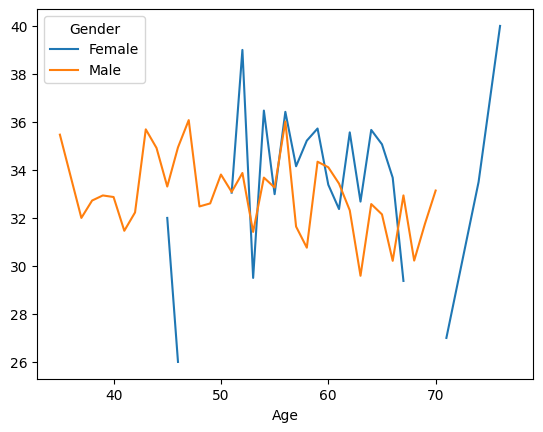

In [24]:
pivot_data = heart.pivot_table(values='Bmi', index='Age', columns='Gender', aggfunc='mean')
pivot_data.plot()

In [25]:
heart.columns
heart['Bmi'] = round(heart['Bmi'])

Text(0.5, 1.0, 'Cholesterol Distribution')

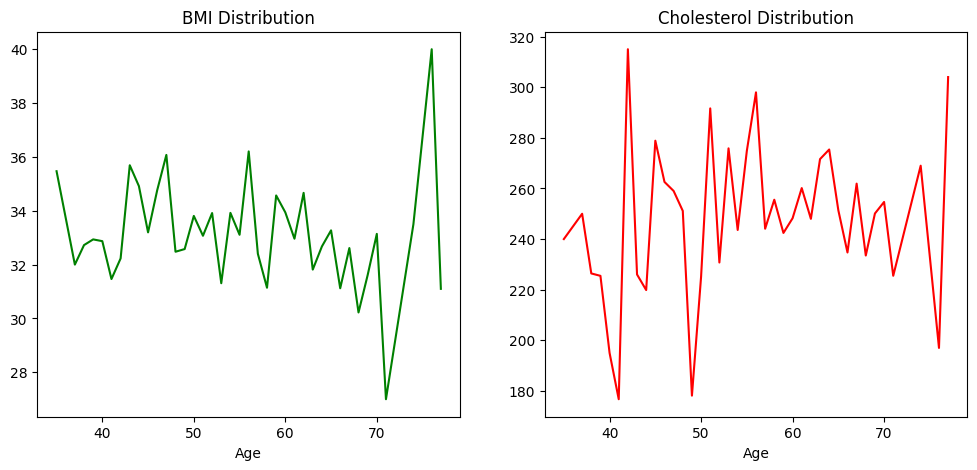

In [26]:
pivoted_data = heart.pivot_table(values=['Bmi', 'Cholesterol'], index='Age', aggfunc='mean')
# pivoted_data.plot(kind='bar')
plt.subplot(1,2,1)
pivoted_data.Bmi.plot(figsize=(12,5),c='g')
plt.title('BMI Distribution')
plt.subplot(1,2,2)
pivoted_data.Cholesterol.plot(figsize=(12,5), c='r')
plt.title('Cholesterol Distribution')

In [27]:
icu = pd.read_csv('icu_heart _patient.csv')

In [28]:
icu['gendera'] = icu['gendera'].replace(1,'Female')
icu['gendera'] = icu['gendera'].replace(2,'Male')
icu

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,Female,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,Male,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,Male,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,Male,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,Male,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,Female,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,Female,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,Male,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,Male,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [29]:
icu.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [30]:
icu = icu.rename(str.title, axis = 'columns')

In [31]:
icu.columns = ['Group', 'Id', 'Outcome', 'Age', 'Gender', 'Bmi', 'Hypertensive',
       'Atrialfibrillation', 'Chd With No Mi', 'Diabetes', 'Deficiencyanemias',
       'Depression', 'Hyperlipemia', 'Renal Failure', 'Copd', 'Max_HR',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure',
       'Respiratory Rate', 'Temperature', 'Sp O2', 'Urine Output',
       'Hematocrit', 'Rbc', 'Mch', 'Mchc', 'Mcv', 'Rdw', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'Pt', 'Inr',
       'Nt-Probnp', 'Creatine Kinase', 'Creatinine', 'Urea Nitrogen',
       'Glucose', 'Blood Potassium', 'Blood Sodium', 'Blood Calcium',
       'Chloride', 'Anion Gap', 'Magnesium Ion', 'Ph', 'Bicarbonate',
       'Lactic Acid', 'Pco2', 'Ef']

In [32]:
icu = icu.drop(columns = ['Group', 'Id', 'Outcome','Hypertensive','Depression', 'Hyperlipemia', 'Renal Failure',
                    'Copd', 'Max_HR','Hematocrit', 'Rbc', 'Mch', 'Mchc', 'Mcv', 'Rdw', 'Leucocyte',
                    'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'Pt', 'Inr','Nt-Probnp',
                    'Chloride', 'Anion Gap', 'Magnesium Ion', 'Bicarbonate', 'Lactic Acid', 'Pco2'])

In [33]:
icu['Bmi'] = round(icu['Bmi'])

In [34]:
heart.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Bmi', 'Max_HR', 'Systole',
       'Hypertension', 'Cholesterol', 'Blood_Glucose_Level', 'Hba1C_Level',
       'Resting_ECG', 'Exercise_angina', 'Oldpeak', 'Slope', 'CA', 'Thal',
       'Chest_pain', 'Diabetes', 'Heart_Disease'],
      dtype='object')

In [35]:
icu.columns

Index(['Age', 'Gender', 'Bmi', 'Atrialfibrillation', 'Chd With No Mi',
       'Diabetes', 'Deficiencyanemias', 'Systolic Blood Pressure',
       'Diastolic Blood Pressure', 'Respiratory Rate', 'Temperature', 'Sp O2',
       'Urine Output', 'Creatine Kinase', 'Creatinine', 'Urea Nitrogen',
       'Glucose', 'Blood Potassium', 'Blood Sodium', 'Blood Calcium', 'Ph',
       'Ef'],
      dtype='object')

In [36]:
icu = icu.merge(heart, how = 'inner', on = ['Age','Gender', 'Bmi', 'Diabetes'])

In [37]:
icu

,Age,Gender,Bmi,Atrialfibrillation,Chd With No Mi,Diabetes,Deficiencyanemias,Systolic Blood Pressure,Diastolic Blood Pressure,Respiratory Rate,...,Blood_Glucose_Level,Hba1C_Level,Resting_ECG,Exercise_angina,Oldpeak,Slope,CA,Thal,Chest_pain,Heart_Disease
0,56,Male,28.0,0,0,1,1,113.280000,61.560000,16.071429,...,145,6.6,0,1,1.6,0,0,3,0,0
1,56,Male,28.0,0,0,1,1,113.280000,61.560000,16.071429,...,145,6.6,0,1,1.2,1,1,2,0,0
2,56,Male,28.0,0,0,1,1,113.280000,61.560000,16.071429,...,145,6.6,0,1,0.6,1,1,1,2,0
3,56,Male,28.0,0,0,1,1,113.280000,61.560000,16.071429,...,145,6.6,0,1,1.6,0,0,3,0,0
4,56,Male,28.0,0,0,1,1,113.280000,61.560000,16.071429,...,145,6.6,0,1,1.2,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,56,Female,31.0,1,0,0,1,128.789474,66.210526,18.000000,...,145,6.5,0,1,1.9,1,2,3,0,0
1011,56,Female,31.0,1,0,0,1,128.789474,66.210526,18.000000,...,145,6.5,0,1,1.9,1,2,3,0,0
1012,56,Female,31.0,1,0,0,1,128.789474,66.210526,18.000000,...,145,6.5,0,1,1.9,1,2,3,0,0
1013,62,Female,26.0,1,0,1,0,142.545455,69.681818,24.500000,...,260,8.2,1,0,1.9,1,3,2,0,0


<Axes: ylabel='Frequency'>

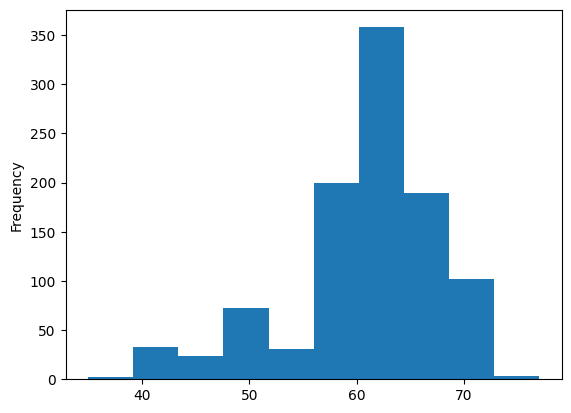

In [40]:
icu.Age.plot(kind ='hist')

In [38]:
icu.Ef.value_counts()

55    494
50    131
20    116
75     93
30     46
40     35
45     30
25     29
35     25
60     16
Name: Ef, dtype: int64